In [1]:
import tensorflow as tf
import numpy as np
#tensor is a fancy word for n-dimensional array
#you can stop using sessions. eager tf is intoduced. now you code it like python without any sessions

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.9.0'

In [3]:
hello = tf.constant("hello ")

In [4]:
world = tf.constant("world")

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [6]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [7]:
with tf.Session() as sess: #we use with so that we nee not close the session
      result = sess.run(hello+world)

In [8]:
print(result) #b represents bytes literal

b'hello world'


In [9]:
a = tf.constant(10)
b = tf.constant(20)

In [10]:
a + b

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [11]:
a + b #tensorflow keeps track of how many times you are asking it to do a thing

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [12]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [13]:
result

30

In [14]:
mat = tf.fill((4,4), 10)

In [15]:
with tf.Session() as sess:
    result = mat.eval() # .eval() is does the same job as sess.run

In [16]:
result

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]], dtype=int32)

In [17]:
zero = tf.zeros([4,4], dtype = tf.float32)

In [18]:
with tf.Session() as sess:
    result = sess.run(zero)

In [19]:
result

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [20]:
randnormal = tf.random_normal([4,4])
randuniform = tf.random_uniform([4,4])

In [21]:
with tf.Session() as sess:
    result1 = sess.run(randnormal)
    result2 = sess.run(randuniform)

In [22]:
sess = tf.InteractiveSession()#now each tensor will called. no need to run session() evertime.
#only used it notebook environent

In [23]:
a = tf.constant([[1,2],
                 [3,4]])

In [24]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [25]:
b = tf.constant([[10], [100]])

In [26]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [27]:
a.eval()

array([[1, 2],
       [3, 4]], dtype=int32)

In [28]:
b.eval()

array([[ 10],
       [100]], dtype=int32)

In [29]:
prod = tf.matmul(a,b)
prod.eval()

array([[210],
       [430]], dtype=int32)

# NN

In [30]:
np.random.seed(101)
tf.set_random_seed(101)

In [31]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [32]:
rand_a = np.random.uniform(0,100,[5,5])
rand_b = np.random.uniform(0,100,[5,1])

In [33]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [34]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [35]:
s = a + b

In [36]:
m = a * b

In [37]:
with tf.Session() as sess:
    result = sess.run(s, feed_dict = {a:rand_a,b:rand_b})
    print(result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [38]:
n_features = 10
n_layers = 1
n_dense_neurons = 3

In [39]:
x = tf.placeholder(tf.float32, shape=(None, n_features))
w = tf.Variable(initial_value= tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(initial_value= tf.ones(n_dense_neurons))

In [40]:
xw = tf.matmul(x,w)

In [41]:
z = tf.add(xw,b)

In [42]:
a = tf.sigmoid(z)

In [72]:
sess = tf.InteractiveSession()
init_vr = tf.global_variables_initializer()
sess.run(init_vr)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [44]:
w.eval()

array([[-0.5470848 ,  0.13193795, -0.04606678],
       [ 0.07586459, -0.2146715 , -2.0631244 ],
       [-0.32359904,  0.05441701,  1.1752304 ],
       [ 1.4275817 , -0.25422668, -0.994871  ],
       [ 1.3439051 ,  0.74986124, -0.48036543],
       [-2.7833767 , -0.55719155, -0.76196057],
       [ 0.00811303,  0.508818  , -0.9617199 ],
       [-1.0975378 ,  0.31045437,  0.95428216],
       [ 0.04464728,  0.87808174,  1.5006272 ],
       [-0.31726363,  0.8014624 ,  0.26721117]], dtype=float32)

In [45]:
layer_out = a.eval(feed_dict = {x:np.random.random([1,n_features])})

In [46]:
layer_out

array([[0.5231126 , 0.96480525, 0.42657572]], dtype=float32)

# Simple Regression

In [48]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [49]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [50]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [53]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

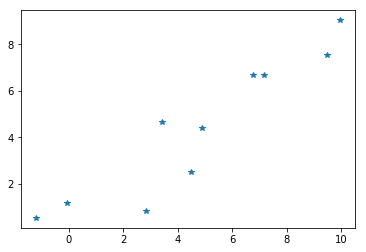

In [57]:
plt.plot(x_data,y_label, "*")

y mx+b

In [58]:
m = tf.Variable(0.44) #used random values
b = tf.Variable(0.87)

In [61]:
error = 0

for x,y in zip(x_data,y_label): # zip will make every point of x_data and it's corresponding y_data a tuple
    y_hat = m*x+b
    
    error += (y-y_hat)**2
    

In [66]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001) #lr is how fast we move in the graph
train = optimizer.minimize(error)

In [74]:
print(train)

name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent_2/update_Variable_3/ApplyGradientDescent"



In [84]:
with tf.Session() as sess:
    sess.run(init_vr)
    epochs = 1 # change the value to 100 and see how better the graph is
    for i in range(epochs):
        sess.run(train)
    slope, intercept = sess.run([m,b])

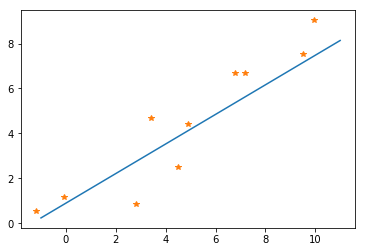

In [85]:
x_test = np.linspace(-1,11,10)

#y = mx+b
y_pred_plot = slope*x_test + intercept
plt.plot(x_test, y_pred_plot)
plt.plot(x_data,y_label, "*")